In [1]:
import pandas as pd
import glob
import os


# Caminho para os arquivos CSV
caminho_pasta = r'D:\Downloads\AESA'  # o 'r' antes da string evita erros com "\"

# Pegar todos os arquivos .csv da pasta
arquivos_csv = glob.glob(os.path.join(caminho_pasta, "*.csv"))

# Lista para armazenar os DataFrames
dfs = []

# Loop para ler cada arquivo e adicionar uma coluna com o nome do arquivo
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo, sep=';', encoding='utf-8', engine='python')
    df['origem'] = os.path.basename(arquivo)  # nome do arquivo como coluna
    dfs.append(df)

# Concatenar tudo
df_total = pd.concat(dfs, ignore_index=True)

# Exibir as primeiras linhas
df_total.head()


,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,"383,7",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,"607,3",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,"138,5",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,"82,5",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,"156,7",01/1994,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [2]:
# Corrigir o nome da coluna, se tiver espaços ou caracteres ocultos
df_total.columns = df_total.columns.str.strip()

df_total['Data'] = pd.to_datetime(df_total['Data'], format='%m/%Y')


In [3]:
df_total.head()

,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,"383,7",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,"607,3",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,"138,5",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,"82,5",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,"156,7",1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [4]:
df_total['Pluviometria observada (mm)'] = (
    df_total['Pluviometria observada (mm)']
    .astype(str)                              # garante que todos os valores são strings
    .str.replace('.', '', regex=False)        # remove os pontos de milhar
    .str.replace(',', '.', regex=False)       # troca vírgula decimal por ponto
    .astype(float)                            # converte para número
)


In [5]:
df_total.head()

,Município,Pluviometria observada (mm),Data,origem
0,Água Branca,383.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
1,Aguiar,607.3,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
2,Alagoa Grande,138.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
3,Alagoa Nova,82.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv
4,Alagoinha,156.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv


In [6]:
# Criar coluna de ano/mês
df_total['AnoMes'] = df_total['Data'].dt.to_period('M')

# Calcular média mensal de todos os municípios
df_media_mensal_estado = df_total.groupby('AnoMes')['Pluviometria observada (mm)'].mean().reset_index()

# Converter AnoMes para datetime novamente (opcional, para gráficos)
df_media_mensal_estado['Data'] = df_media_mensal_estado['AnoMes'].dt.to_timestamp()

# Exibir
print(df_media_mensal_estado.head())


    AnoMes  Pluviometria observada (mm)       Data
0  1994-01                   236.633588 1994-01-01
1  1994-02                   110.181538 1994-02-01
2  1994-03                   162.813178 1994-03-01
3  1994-04                   120.398450 1994-04-01
4  1994-05                   122.974419 1994-05-01


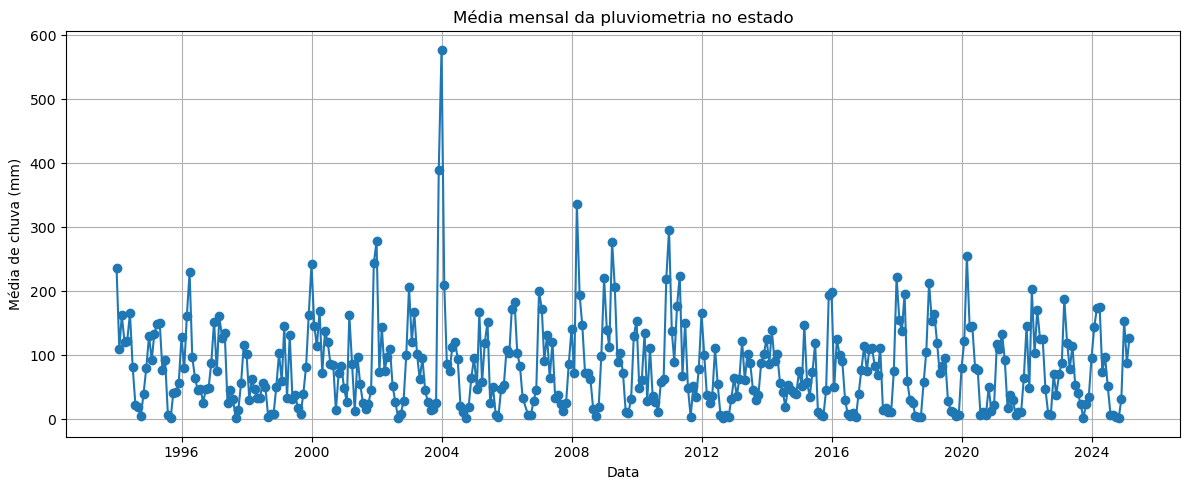

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_media_mensal_estado['Data'], df_media_mensal_estado['Pluviometria observada (mm)'], marker='o')
plt.title("Média mensal da pluviometria no estado")
plt.xlabel("Data")
plt.ylabel("Média de chuva (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


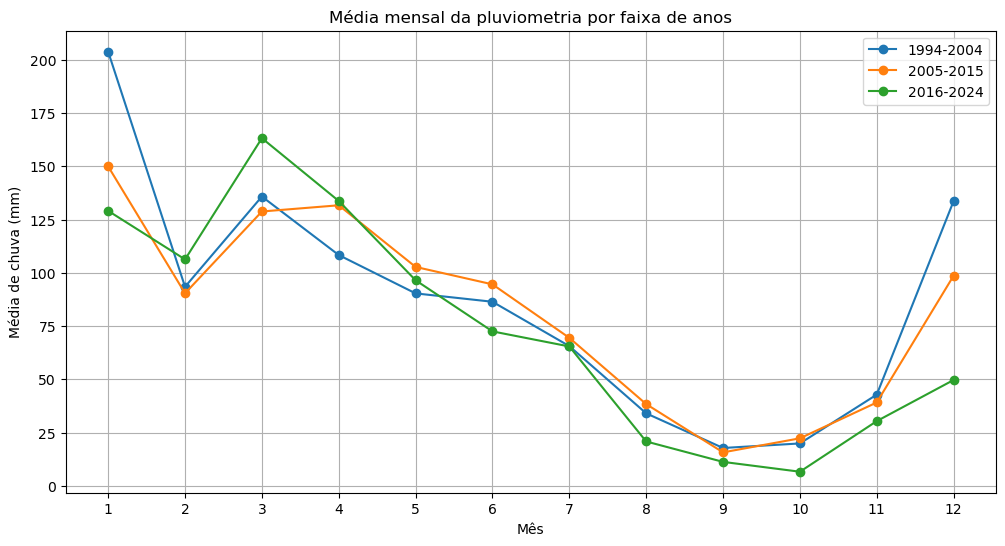

In [8]:
import matplotlib.pyplot as plt

# Faixas de anos que quer comparar
faixas = {
    '1994-2004': (1994, 2004),
    '2005-2015': (2005, 2015),
    '2016-2024': (2016, 2024),
}

plt.figure(figsize=(12,6))

for label, (ano_inicio, ano_fim) in faixas.items():
    df_faixa = df_total[(df_total['Data'].dt.year >= ano_inicio) & (df_total['Data'].dt.year <= ano_fim)]
    media_mensal = df_faixa.groupby(df_faixa['Data'].dt.month)['Pluviometria observada (mm)'].mean()
    plt.plot(media_mensal.index, media_mensal.values, marker='o', label=label)

plt.title('Média mensal da pluviometria por faixa de anos')
plt.xlabel('Mês')
plt.ylabel('Média de chuva (mm)')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.show()


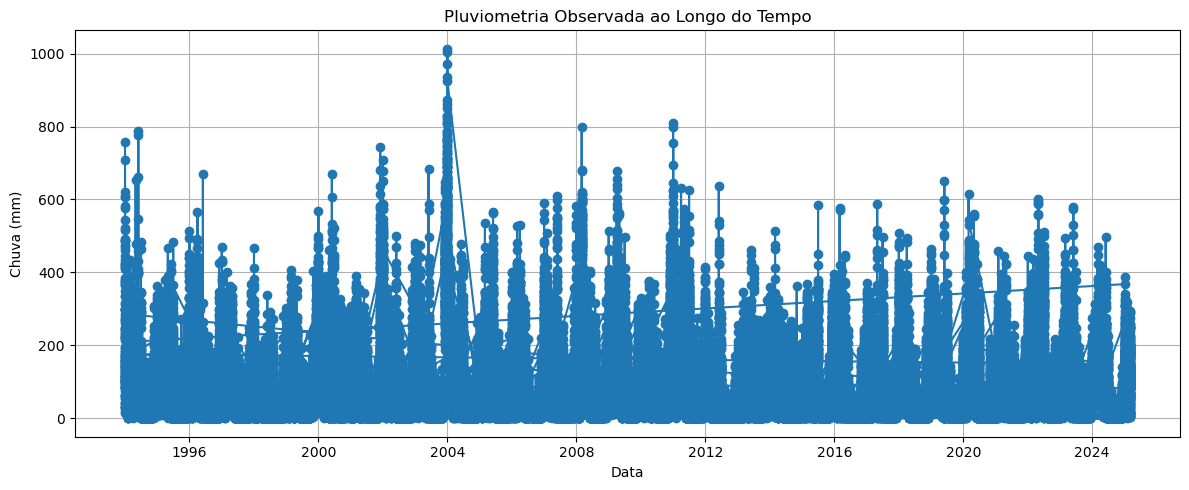

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_total['Data'], df_total['Pluviometria observada (mm)'], marker='o', linestyle='-')
plt.title("Pluviometria Observada ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Chuva (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


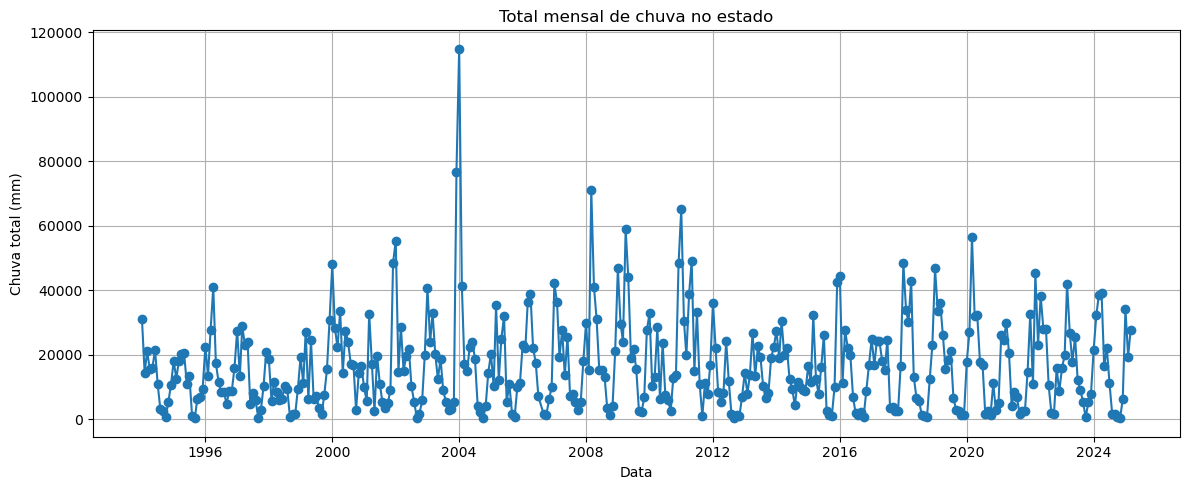

In [10]:
df_mensal_estado = df_total.groupby(df_total['Data'].dt.to_period('M'))['Pluviometria observada (mm)'].sum().reset_index()
df_mensal_estado['Data'] = df_mensal_estado['Data'].dt.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(df_mensal_estado['Data'], df_mensal_estado['Pluviometria observada (mm)'], marker='o', linestyle='-')
plt.title("Total mensal de chuva no estado")
plt.xlabel("Data")
plt.ylabel("Chuva total (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


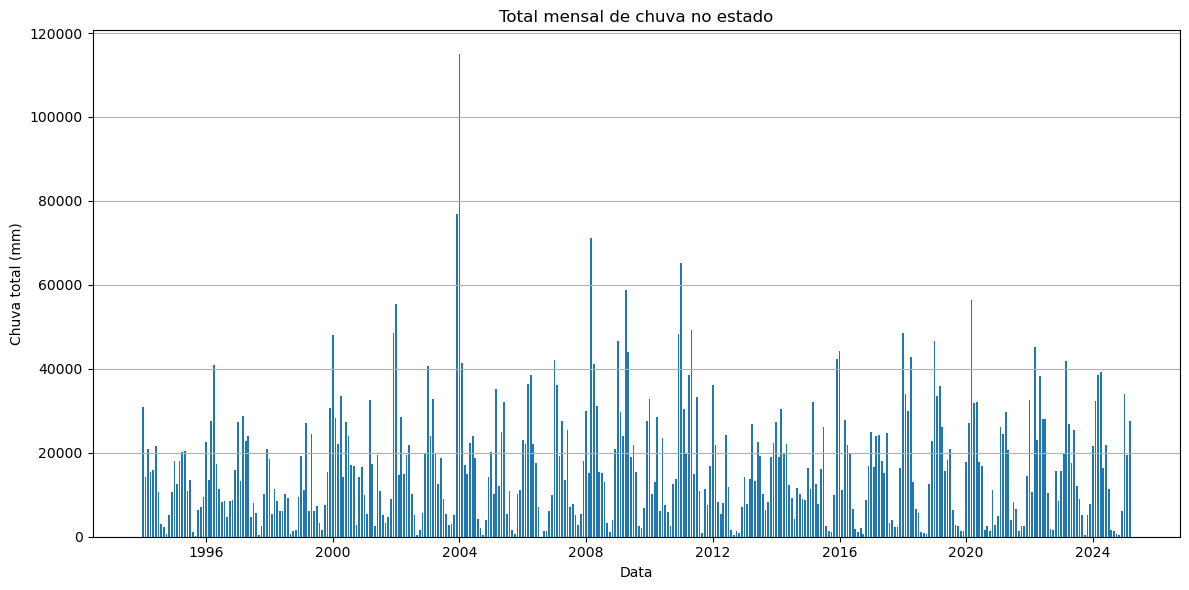

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df_mensal_estado['Data'], df_mensal_estado['Pluviometria observada (mm)'], width=20)  # width ajusta a largura das barras
plt.title("Total mensal de chuva no estado")
plt.xlabel("Data")
plt.ylabel("Chuva total (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [12]:
df_total.head(500)

,Município,Pluviometria observada (mm),Data,origem,AnoMes
0,Água Branca,383.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
1,Aguiar,607.3,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
2,Alagoa Grande,138.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
3,Alagoa Nova,82.5,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
4,Alagoinha,156.7,1994-01-01,Pluviometria (mm) - 01_01_1994 a 31_01_1994.csv,1994-01
...,...,...,...,...,...
495,Duas Estradas,101.7,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
496,Emas,160.2,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
497,Esperança,96.1,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01
498,Fagundes,89.7,1997-01-01,Pluviometria (mm) - 01_01_1997 a 31_01_1997.csv,1997-01


In [29]:
df_mensal_estado.head(10)

,Data,Pluviometria observada (mm)
0,1994-01-01,30999.0
1,1994-02-01,14323.6
2,1994-03-01,21002.9
3,1994-04-01,15531.4
4,1994-05-01,15863.7
5,1994-06-01,21505.4
6,1994-07-01,10763.0
7,1994-08-01,3008.2
8,1994-09-01,2417.6
9,1994-10-01,697.1


In [33]:
df_media_mensal_estado.head(30)

,AnoMes,Pluviometria observada (mm),Data
0,1994-01,236.633588,1994-01-01
1,1994-02,110.181538,1994-02-01
2,1994-03,162.813178,1994-03-01
3,1994-04,120.398450,1994-04-01
4,1994-05,122.974419,1994-05-01
5,1994-06,165.426154,1994-06-01
6,1994-07,82.160305,1994-07-01
7,1994-08,22.963359,1994-08-01
8,1994-09,18.454962,1994-09-01
9,1994-10,5.321374,1994-10-01


In [41]:
df_media_mensal_estado.to_csv("media mensal chuva paraíba.csv",index=True, encoding='utf-8')

In [14]:
df_total.to_csv("Pluviometria 1994-2024.csv", index=False, encoding='utf-8')


In [47]:
!pip install pymannkendall

In [51]:
import pymannkendall as mk

serie = df_media_mensal_estado["Pluviometria observada (mm)"]

# Aplicar o teste de Mann-Kendall
resultado = mk.original_test(serie)

print(resultado)

Mann_Kendall_Test(trend='no trend', h=False, p=0.18337422411687743, z=-1.3304373234584859, Tau=-0.04609252913936718, s=-3215.0, var_s=5835833.666666667, slope=-0.033654472291750344, intercept=76.18917581833114)


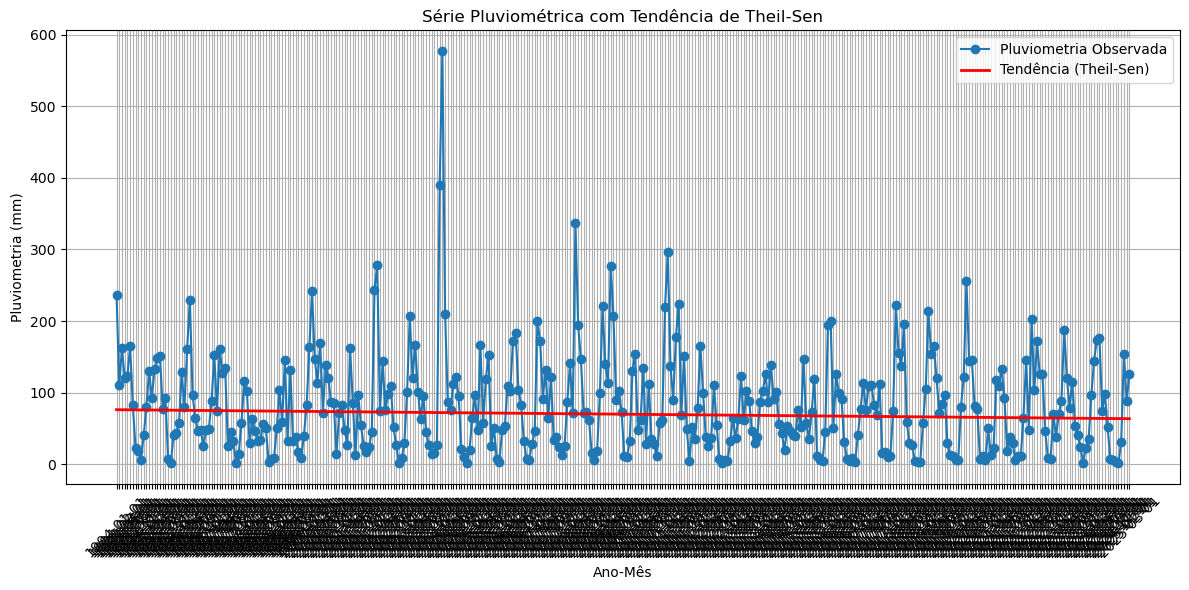

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Série de tempo
x = np.arange(len(df_media_mensal_estado["Pluviometria observada (mm)"]))
y = df_media_mensal_estado["Pluviometria observada (mm)"].values

# Reta de tendência (Theil-Sen)
slope = -0.033654472291750344
intercept = 76.18917581833114
tendencia = intercept + slope * x

# Plotar
plt.figure(figsize=(12,6))
plt.plot(df_media_mensal_estado["AnoMes"], y, label="Pluviometria Observada", marker="o", linestyle="-")
plt.plot(df_media_mensal_estado["AnoMes"], tendencia, color="red", label="Tendência (Theil-Sen)", linewidth=2)

plt.title("Série Pluviométrica com Tendência de Theil-Sen")
plt.xlabel("Ano-Mês")
plt.ylabel("Pluviometria (mm)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
import pymannkendall as mk

# Série de precipitação (mensal ou anual, dependendo do que você escolheu)
serie = df_media_mensal_estado["Pluviometria observada (mm)"]

# Teste Mann-Kendall original
res_original = mk.original_test(serie)

# Teste com correção de Hamed & Rao (pré-branqueamento para autocorrelação)
res_hamed = mk.hamed_rao_modification_test(serie)

# Teste com correção de Yue & Wang (mais robusto à autocorrelação)
res_yue = mk.yue_wang_modification_test(serie)

# Exibir os resultados
print("===== Mann-Kendall Original =====")
print(res_original)
print("\n===== Hamed & Rao Modification =====")
print(res_hamed)
print("\n===== Yue & Wang Modification =====")
print(res_yue)


===== Mann-Kendall Original =====
Mann_Kendall_Test(trend='no trend', h=False, p=0.18337422411687743, z=-1.3304373234584859, Tau=-0.04609252913936718, s=-3215.0, var_s=5835833.666666667, slope=-0.033654472291750344, intercept=76.18917581833114)

===== Hamed & Rao Modification =====
Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.19202662680815497, z=-1.30460722500454, Tau=-0.04609252913936718, s=-3215.0, var_s=6069210.299645974, slope=-0.033654472291750344, intercept=76.18917581833114)

===== Yue & Wang Modification =====
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.0015581408430782595, z=-3.163631236888212, Tau=-0.04609252913936718, s=-3215.0, var_s=1032095.8572900767, slope=-0.033654472291750344, intercept=76.18917581833114)


In [71]:
print(serie.head(20))

0     236.633588
1     110.181538
2     162.813178
3     120.398450
4     122.974419
5     165.426154
6      82.160305
7      22.963359
8      18.454962
9       5.321374
10     40.272519
11     79.772180
12    130.305072
13     92.262222
14    133.560741
15    149.071111
16    150.764706
17     76.562238
18     92.782069
19      7.345517
Name: Pluviometria observada (mm), dtype: float64


In [73]:
print(df_media_mensal_estado.head(20))

        AnoMes  Pluviometria observada (mm)       Data
0   1994-01-01                   236.633588 1994-01-01
1   1994-02-01                   110.181538 1994-02-01
2   1994-03-01                   162.813178 1994-03-01
3   1994-04-01                   120.398450 1994-04-01
4   1994-05-01                   122.974419 1994-05-01
5   1994-06-01                   165.426154 1994-06-01
6   1994-07-01                    82.160305 1994-07-01
7   1994-08-01                    22.963359 1994-08-01
8   1994-09-01                    18.454962 1994-09-01
9   1994-10-01                     5.321374 1994-10-01
10  1994-11-01                    40.272519 1994-11-01
11  1994-12-01                    79.772180 1994-12-01
12  1995-01-01                   130.305072 1995-01-01
13  1995-02-01                    92.262222 1995-02-01
14  1995-03-01                   133.560741 1995-03-01
15  1995-04-01                   149.071111 1995-04-01
16  1995-05-01                   150.764706 1995-05-01
17  1995-0